# `Health Care Stroke Business Analytics`

## `Attribute Information`

* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: "NO" if the patient doesn't have hypertension, "Yes" if the patient has hypertension
* 5) heart_disease: "NO" if the patient doesn't have any heart diseases, "Yes" if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: "Yes" if the patient had a stroke or "NO" if not

## `Objectives` 
* Numerical and Graphical Representation of client's Questions

### Import Some Helper Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'Dark2' , font_scale=1.1 
              , rc = {'figure.figsize' : (10 , 4)})
colors = ['red', 'yellow']
explode = (0.05, 0.05)

### Read Data Set

In [3]:
df = pd.read_csv('Modified-healthcare-dataset-stroke-data.csv')

### Data OverView 

In [4]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NO,YES,Yes,Private,Urban,228.69,36.6,formerly smoked,YES
1,Female,61.0,NO,NO,Yes,Self-employed,Rural,202.21,30.5,never smoked,YES
2,Male,80.0,NO,YES,Yes,Private,Rural,105.92,32.5,never smoked,YES


In [5]:
df.tail(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,30.6,never smoked,NO
5108,Male,51.0,NO,NO,Yes,Private,Rural,166.29,25.6,formerly smoked,NO
5109,Female,44.0,NO,NO,Yes,Govt_job,Urban,85.28,26.2,Unknown,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


## `Numerical and Graphical Representation of client's Questions`

### Q1 : For People Who Never Smoked What Is Percentage Of People Who Have Hypertension ?

In [7]:
df[df['smoking_status'] == 'never smoked']['hypertension'].value_counts(normalize = True ).to_frame()*100

,hypertension
NO,87.737844
YES,12.262156


<AxesSubplot:ylabel='hypertension'>

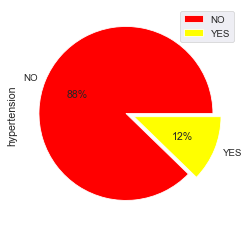

In [8]:
df[df['smoking_status'] == 'never smoked']['hypertension'].value_counts().to_frame().plot(kind = 'pie' , y='hypertension' ,
                                                                                          autopct='%1.0f%%' ,colors=colors,
                                                                                          explode=explode)

### Q2 : Which Gender Prone To Stroke Most ?

In [9]:
df.groupby(['gender'])['stroke'].value_counts().to_frame()

stroke
gender stroke        
Female NO        2853
       YES        141
Male   NO        2008
       YES        108

<AxesSubplot:xlabel='gender', ylabel='count'>

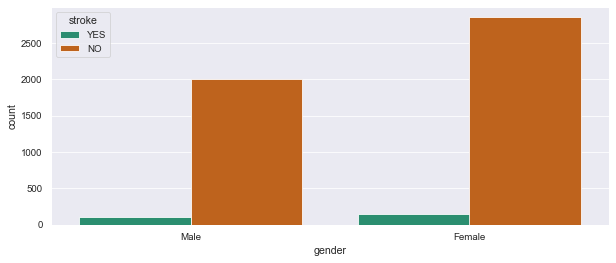

In [10]:
sns.countplot(x = df['gender'] , hue = df['stroke'])

### Q3 : Which Gender That Has hypertension Most ?

In [11]:
df[df['hypertension'] == 'YES']['gender'].value_counts().to_frame()

,gender
Female,276
Male,222


<AxesSubplot:xlabel='count', ylabel='gender'>

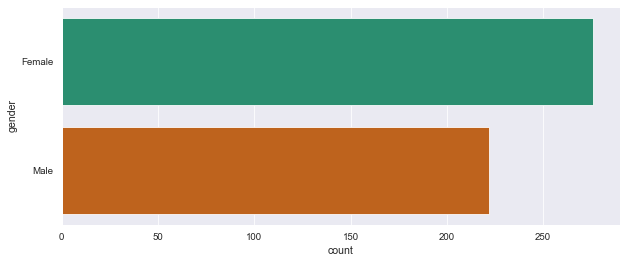

In [12]:
sns.countplot(data = df[df['hypertension'] == 'YES'] , y = 'gender')

### Q4 : What is percentage of hypertension for people who married or not ?

In [13]:
df.groupby(['ever_married'])['hypertension'].value_counts(normalize = True ).to_frame()*100

hypertension
ever_married hypertension              
No           NO               96.983495
             YES               3.016505
Yes          NO               86.728303
             YES              13.271697

<AxesSubplot:xlabel='count', ylabel='ever_married'>

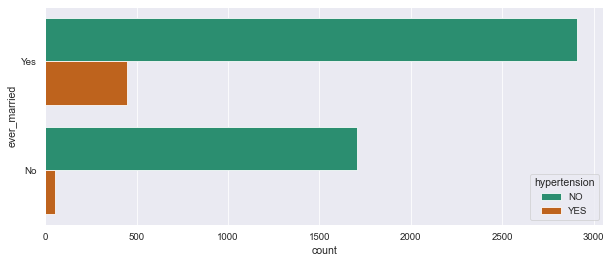

In [14]:
sns.countplot(y = df['ever_married'] , hue = df['hypertension'])

### Q5 : For married People have heart disease high or not ?

In [15]:
df[df['ever_married'] == 'Yes']['heart_disease'].value_counts().to_frame()

,heart_disease
NO,3109
YES,244


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

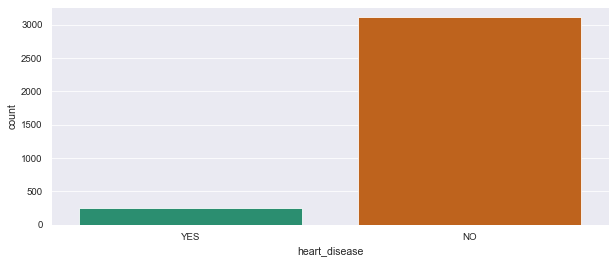

In [16]:
sns.countplot(data = df[df['ever_married'] == 'Yes'] , x = 'heart_disease')

### Q6 : Mean age of people who have hypertension & stroke ?

In [17]:
df[(df['hypertension'] == 'YES') & (df['stroke'] == 'YES')]['age'].mean()

70.21212121212122

### Q7: Mean age of people who have heart disease & stroke ?

In [18]:
df[(df['stroke'] == 'YES') & (df['heart_disease'] == 'YES')]['age'].mean()

71.80851063829788

### Q8: Mean age of people who have heart disease & hypertension ?

In [19]:
df[(df['hypertension'] == 'YES') & (df['heart_disease'] == 'YES')]['age'].mean()

70.578125

### Q9: Mean age of people who have heart disease & stroke & hypertension ?

In [20]:
df[(df['hypertension'] == 'YES') & (df['stroke'] == 'YES') & (df['heart_disease'] == 'YES')]['age'].mean()

72.76923076923077

### Q10 : Which working type has high percentage of hypertension ?

In [21]:
df[df['hypertension'] == 'YES']['work_type'].value_counts().to_frame()

,work_type
Private,281
Self-employed,144
Govt_job,73


<AxesSubplot:ylabel='work_type'>

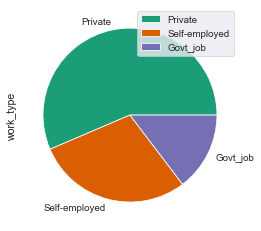

In [22]:
df[df['hypertension'] == 'YES']['work_type'].value_counts().to_frame().plot(kind = 'pie' , y='work_type')

### Q11 : Which working type has high percentage of heart diseases ?

In [23]:
df[df['heart_disease'] == 'YES']['work_type'].value_counts().to_frame()

,work_type
Private,158
Self-employed,81
Govt_job,36
Never_worked,1


<AxesSubplot:xlabel='work_type', ylabel='count'>

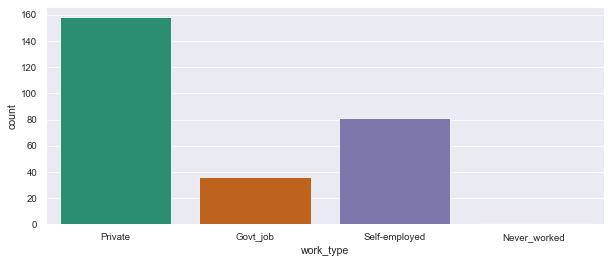

In [24]:
sns.countplot(data = df[df['heart_disease'] == 'YES'] , x = 'work_type')

### Q12 : Which working type has high percentage of stroke ?

In [25]:
df[df['stroke'] == 'YES']['work_type'].value_counts().to_frame()

,work_type
Private,149
Self-employed,65
Govt_job,33
Never_worked,2


<AxesSubplot:xlabel='work_type', ylabel='count'>

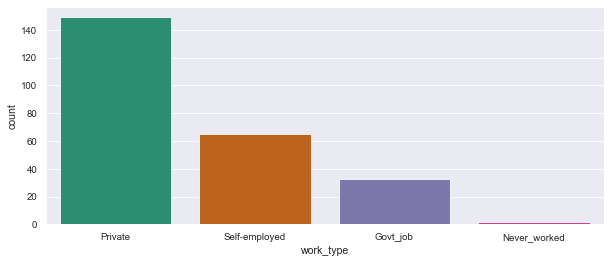

In [26]:
sns.countplot(data = df[df['stroke'] == 'YES'] , x = 'work_type')

### Q13 : Is residence type is major factor of heart diseases ?

In [27]:
df.groupby(['Residence_type'])['heart_disease'].value_counts().to_frame()

heart_disease
Residence_type heart_disease               
Rural          NO                      2380
               YES                      134
Urban          NO                      2454
               YES                      142

<AxesSubplot:xlabel='count', ylabel='Residence_type'>

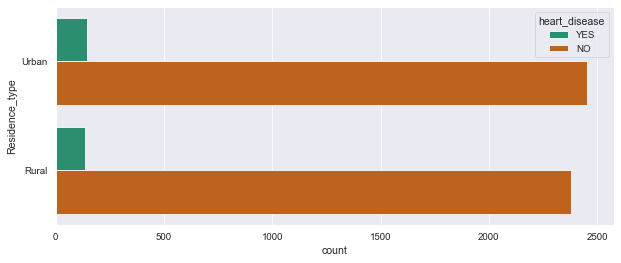

In [28]:
sns.countplot(y = df['Residence_type'], hue = df['heart_disease'])

### Q14 : We need statistical  describtion about glucose level for people who have heart disease

In [29]:
df.groupby(['heart_disease'])['avg_glucose_level'].describe().T

heart_disease,NO,YES
count,4834.000000,276.000000
mean,104.396494,136.818768
std,43.432070,62.823103
min,55.120000,56.310000
25%,76.942500,83.430000
50%,91.265000,106.545000
75%,112.540000,201.872500
max,267.760000,271.740000


In [30]:
df.groupby(['heart_disease'])['avg_glucose_level'].agg([np.mean , np.min , np.max , np.median]).T

heart_disease,NO,YES
mean,104.396494,136.818768
amin,55.120000,56.310000
amax,267.760000,271.740000
median,91.265000,106.545000


###### max

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

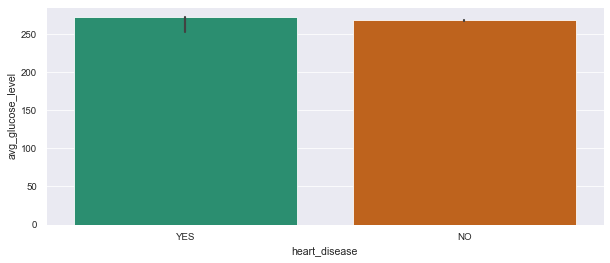

In [31]:
sns.barplot(data = df , x = 'heart_disease' , y = 'avg_glucose_level' , estimator=np.max)

###### min

<AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>

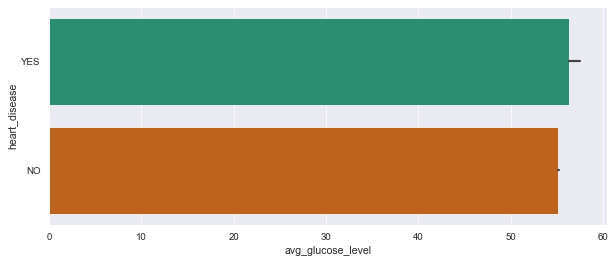

In [32]:
sns.barplot(data = df , y = 'heart_disease' , x = 'avg_glucose_level' , estimator=np.min)

###### mean

<AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>

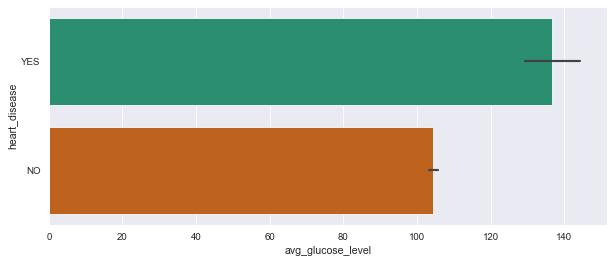

In [33]:
sns.barplot(data = df , y = 'heart_disease' , x = 'avg_glucose_level')

### Q15 : Is smoking type has an efect on stroke ?


In [34]:
pd.pivot_table(data = df , columns='stroke' , index='smoking_status' , values = 'dummy' , aggfunc=len).T

KeyError: 'dummy'

In [ ]:
sns.countplot(df['smoking_status'] , hue = df['stroke'])

### Q16 : Is there is any correlation between bmi & avg_glucose_level ? 

In [ ]:
df[['bmi' , 'avg_glucose_level']].corr()

In [ ]:
sns.heatmap(df[['bmi' , 'avg_glucose_level']].corr() , annot=True , cmap = 'Dark2')

In [ ]:
sns.regplot(data = df , x = 'bmi', y = 'avg_glucose_level') # very week +ve corr

### Q17 : What is Min bmi & avg_glucose_level & age for people who have stroke ?

###### Age

In [ ]:
df[df['stroke'] == 'YES']['age'].min()

In [ ]:
sns.barplot(data = df , x = 'stroke' , y = 'age' , estimator=np.min)

In [ ]:
df[df['stroke'] == 'NO']['age'].min()

###### bmi

In [ ]:
df[df['stroke'] == 'YES']['bmi'].min()

In [ ]:
sns.barplot(data = df , x = 'stroke' , y = 'bmi' , estimator=np.min)

###### avg_glucose_level

In [ ]:
df[df['stroke'] == 'NO']['avg_glucose_level'].min()

In [ ]:
sns.barplot(data = df , x = 'stroke' , y = 'avg_glucose_level' , estimator=np.min)